In [1]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('all.csv', index_col = 0)

## Format data for model

In [3]:
df['fuel_other'] = df['fuel_flexfuel'] | df['fuel_elec_or_hybrid']

In [4]:
df = df.drop(['fuel_flexfuel','fuel_elec_or_hybrid', 'fuel_electric', 'fuel_hybrid'], axis = 1)

In [5]:
expanded_other = (df['make_chevrolet'] |
                  df['make_dodge'] |
                  df['make_gmc'] |
                  df['make_lincoln'] |
                  df['make_mercury'] |
                  df['make_mitsubishi_fuso'] |
                  df['make_nissan'] |
                  df['make_other'] |
                  df['make_toyota']
                 )

In [6]:
df['make_other'] = expanded_other

In [7]:
df = df.drop(['make_chevrolet',
                'make_dodge',
                'make_gmc',
                'make_lincoln',
                'make_mercury',
                'make_mitsubishi_fuso',
                'make_nissan',
                'make_toyota'], axis = 1)

## Create x and y dataframes

In [8]:
df_y = df[[col for col in df.columns if 'y_' in col]]

In [9]:
df_x = df.drop([col for col in df.columns if 'y_' in col], axis = 1)

In [10]:
df_x = df_x.drop(['make', 'op_descriptions', 'date', 'fuel', 'appointment_month', 'season', 'year', 'error_code'], axis = 1)

In [28]:
plot_heatmap = False

if plot_heatmap == True:
    corr = df_y.corr()
    corr.columns = [i[2:].replace('_', ' ') for i in corr.columns]
    corr.index = [i[2:].replace('_', ' ') for i in corr.index]
    fig, ax = plt.subplots(figsize=(12,9))
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
    plt.show()

In [50]:
plot_features_per_string = False

if plot_features_per_string == True:
    features_per_string = df_y.sum(axis = 1).value_counts() / df_y.shape[0]
    fig, ax = plt.subplots(figsize=(9,6))
    sns.barplot(x = features_per_string.index, y = features_per_string, palette = 'hls')
    sns.despine()
    plt.show()

In [34]:
df_y.sum(axis = 1).value_counts()

1    9300
2    3320
3    1536
4    1289
5     447
6     277
7      24
dtype: int64

In [12]:
df['y_multi_point_inspection'].value_counts()

0    10462
1     5731
Name: y_multi_point_inspection, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

In [14]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')

In [15]:
y = df['y_multi_point_inspection']
x = df_x.fillna(df_x.median())

In [16]:
clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

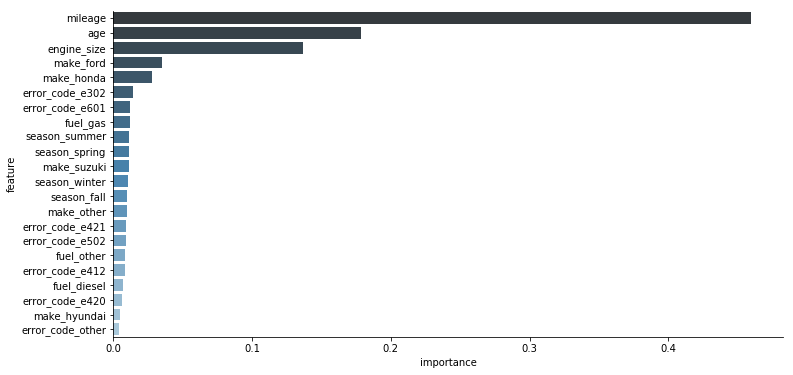

In [67]:
features = pd.DataFrame()
features['feature'] = x.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(y = features.index,
            x = features['importance'],
            palette = 'Blues_d',
            orient = 'h')
sns.despine()
plt.show()

In [91]:
model_dict = {}

for output_col in df_y.columns:
    
    print('Fitting ', output_col)
    y = df_y[output_col]
    
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(y, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='f1',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose = 1)

    grid_search.fit(x, y)
    model_dict[output_col] = grid_search

Fitting  y_bespoke
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  4.8min finished


Fitting  y_multi_point_inspection
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  5.3min finished


Fitting  y_battery_test
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  5.3min finished


Fitting  y_tire_inflation
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  5.0min finished


Fitting  y_hazardous_waste
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  5.0min finished


Fitting  y_change_oil
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  4.9min finished


Fitting  y_filter
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  4.8min finished


Fitting  y_belts_and_hoses
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  5.0min finished


Fitting  y_air_filter
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  5.3min finished


Fitting  y_safety_systems
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  5.1min finished


Fitting  y_nitro_fill
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  5.3min finished


Fitting  y_repair_or_refinish
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  5.5min finished


In [98]:
df_x.loc[1,:]

make_ford               1.0
make_honda              0.0
make_hyundai            0.0
make_other              0.0
make_suzuki             0.0
engine_size             3.0
mileage             73283.0
fuel_diesel             0.0
fuel_gas                1.0
season_fall             0.0
season_spring           0.0
season_summer           0.0
season_winter           1.0
age                     4.0
error_code_e302         0.0
error_code_e412         0.0
error_code_e420         0.0
error_code_e421         0.0
error_code_e502         0.0
error_code_e601         1.0
error_code_other        0.0
fuel_other              0.0
Name: 1, dtype: float64

In [104]:
model_dict['y_battery_test'].predict_proba(example)[0][1]

AttributeError: 'GridSearchCV' object has no attribute 'classes_'

In [117]:
example = df_x.loc[100,:]
example_probs = pd.DataFrame()

for output_col in df_y.columns:
    
    example_probs.loc['prob', output_col] = model_dict[output_col].predict_proba(example)[0][1]

In [118]:
example_probs

,y_bespoke,y_multi_point_inspection,y_battery_test,y_tire_inflation,y_hazardous_waste,y_change_oil,y_filter,y_belts_and_hoses,y_air_filter,y_safety_systems,y_nitro_fill,y_repair_or_refinish
prob,0.523643,0.256633,0.101279,0.008721,0.005537,0.045832,0.121483,0.01596,0.017068,0.017879,0.380692,0.046155


In [119]:
example_probs.T.squeeze().sort_values(ascending = False)

y_bespoke                   0.523643
y_nitro_fill                0.380692
y_multi_point_inspection    0.256633
y_filter                    0.121483
y_battery_test              0.101279
y_repair_or_refinish        0.046155
y_change_oil                0.045832
y_safety_systems            0.017879
y_air_filter                0.017068
y_belts_and_hoses           0.015960
y_tire_inflation            0.008721
y_hazardous_waste           0.005537
Name: prob, dtype: float64

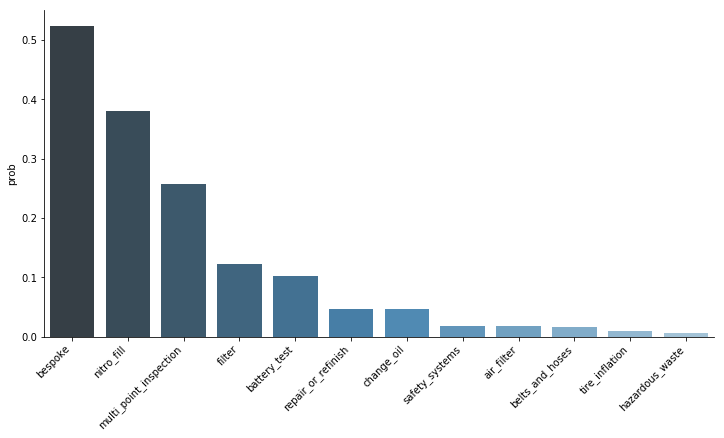

In [121]:
fig, ax = plt.subplots(figsize=(12,6))
to_plot = example_probs.T.squeeze().sort_values(ascending = False)
sns.barplot(x = [col[2:] for col in to_plot.index], y = to_plot, palette = 'Blues_d')
sns.despine()
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [114]:
results = pd.DataFrame()

for output_col in df_y.columns:
    
    y_pred = model_dict[output_col].predict(x)
    
    results.loc[output_col, 'accuracy'] = sk.metrics.accuracy_score(y, y_pred)
    results.loc[output_col, 'precision'] = sk.metrics.precision_score(y, y_pred)
    results.loc[output_col, 'recall'] = sk.metrics.recall_score(y, y_pred)
    results.loc[output_col, 'f-score'] = sk.metrics.f1_score(y, y_pred)
    results.loc[output_col, 'roc auc'] = sk.metrics.roc_auc_score(y, y_pred)

In [115]:
results

,accuracy,precision,recall,f-score,roc auc
y_bespoke,0.713086,0.045152,0.063019,0.052610,0.435087
y_multi_point_inspection,0.604582,0.135176,0.394235,0.201322,0.514628
y_battery_test,0.867288,0.081967,0.004885,0.009221,0.498484
y_tire_inflation,0.754832,0.124561,0.155838,0.138455,0.498674
y_hazardous_waste,0.857346,0.087774,0.013679,0.023669,0.496554
y_change_oil,0.873587,0.000000,0.000000,0.000000,0.500000
y_filter,0.870067,0.047619,0.001466,0.002844,0.498612
y_belts_and_hoses,0.873587,0.000000,0.000000,0.000000,0.500000
y_air_filter,0.873587,0.000000,0.000000,0.000000,0.500000
y_safety_systems,0.873526,0.000000,0.000000,0.000000,0.499965


In [85]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(y, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='f1',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose = 1)

    grid_search.fit(x, y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best score: 0.11973766545522045
Best parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10}


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  4.8min finished


In [ ]:
joblib.dump(model, 'multi_point_inspection.pkl')

In [20]:
from sklearn.externals import joblib

In [21]:
joblib.dump(clf, 'multi_point_inspection.pkl')

['multi_point_inspection.pkl']

In [72]:
y = df_y['y_battery_test']

In [87]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(y, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='roc_auc',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose = 2)

    grid_search.fit(x, y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))